[Index](index.ipynb)


## Clustering for dataset exploration
* [Unsupervised learning](#Ul)
* [How many clusters?](#Hmc)
* [Clustering 2D points](#C2p)
* [Inspect your clustering](#Iyc)
* [Evaluating a clustering](#Eac)
* [How many clusters of grain?](#Hmcog)
* [Evaluating the grain clustering](#Etgc)
* [Transforming features for better clusterings](#Tffbc)
* [Scaling fish data for clustering](#Sfdfc)
* [Clustering the fish data](#Ctfd)
* [Clustering stocks using KMeans](#CsuK)
* [Which stocks move together?](#Wsmt)


## Visualization with hierarchical clustering and t-SNE

* [Visualizing hierarchies](#Vh)
* [How many merges?](#Hmm)
* [Hierarchical clustering of the grain data](#Hcotgd)
* [Hierarchies of stocks](#Hos)
* [Cluster labels in hierarchical clustering](#Clihc)
* [Which clusters are closest?](#Wcac)
* [Different linkage, different hierarchical clustering!](#Dldhc)
* [Intermediate clusterings](#Ic)
* [Extracting the cluster labels](#Etcl)
* [t-SNE for 2-dimensional maps](#tf2m)
* [t-SNE visualization of grain dataset](#tvogd)
* [A t-SNE map of the stock market](#Atmotsm)


## Decorrelating your data and dimension reduction
* [Visualizing the PCA transformation](#VtPt)
* [Correlated data in nature](#Cdin)
* [Decorrelating the grain measurements with PCA](#DtgmwP)
* [Principal components](#Pc)
* [Intrinsic dimension](#Id)
* [The first principal component](#Tfpc)
* [Variance of the PCA features](#VotPf)
* [Intrinsic dimension of the fish data](#Idotfd)
* [Dimension reduction with PCA](#DrwP)
* [Dimension reduction of the fish measurements](#Drotfm)
* [A tf-idf word-frequency array](#Atwa)
* [Clustering Wikipedia part I](#CWpI)
* [Clustering Wikipedia part II](#CWpI)

## Discovering interpretable features
* [Non-negative matrix factorization (NMF)](#Nmf()
* [Non-negative data](#Nd)
* [NMF applied to Wikipedia articles](#NatWa)
* [NMF features of the Wikipedia articles](#NfotWa)
* [NMF reconstructs samples](#Nrs)
* [NMF learns interpretable parts](#Nlip)
* [NMF learns topics of documents](#Nltod)
* [Explore the LED digits dataset](#EtLdd)
* [NMF learns the parts of images](#Nltpoi)
* [PCA doesn't learn parts](#Pdlp)
* [Building recommender systems using NMF](#BrsuN)
* [Which articles are similar to 'Cristiano Ronaldo'?](#Waast'R)
* [Recommend musical artists part I](#RmapI)
* [Recommend musical artists part II](#RmapI)
* [Final thoughts](#Ft)

# 1. Clustering  for dataset exploration

<p id ='Ul'><p>
### Unsupervised learning

In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<p id ='Hmc'><p>
### How many clusters?

In [379]:
cd data/


[Errno 2] No such file or directory: 'data/'
/Users/satyammishra/Desktop/Datacamp stuff/jupyternotes/data


In [380]:
from helper_data import points, newpoints, varieties, variety_numbers, titles

In [381]:
points[:10]

array([[ 0.06544649, -0.76866376],
       [-1.52901547, -0.42953079],
       [ 1.70993371,  0.69885253],
       [ 1.16779145,  1.01262638],
       [-1.80110088, -0.31861296],
       [-1.63567888, -0.02859535],
       [ 1.21990375,  0.74643463],
       [-0.26175155, -0.62492939],
       [-1.61925804, -0.47983949],
       [-1.84329582, -0.16694431]])

In [382]:
newpoints[:10]

array([[ 0.40023333, -1.26544471],
       [ 0.80323037,  1.28260167],
       [-1.39507552,  0.05572929],
       [-0.34119268, -1.07661994],
       [ 1.54781747,  1.40250049],
       [ 0.24503202, -0.48344233],
       [ 1.20706886,  0.8887526 ],
       [ 1.25132628,  1.15555395],
       [ 1.81004415,  0.96553073],
       [-1.66963401, -0.30810351]])

In [383]:
xs = points[: , 0]
xs[:10]

array([ 0.06544649, -1.52901547,  1.70993371,  1.16779145, -1.80110088,
       -1.63567888,  1.21990375, -0.26175155, -1.61925804, -1.84329582])

In [384]:
ys  = points[: , 1]
ys[:10]

array([-0.76866376, -0.42953079,  0.69885253,  1.01262638, -0.31861296,
       -0.02859535,  0.74643463, -0.62492939, -0.47983949, -0.16694431])

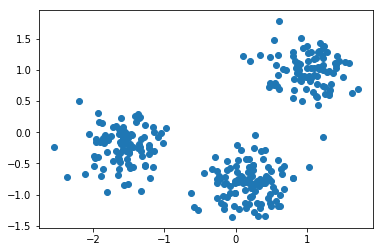

In [385]:
plt.scatter(xs, ys)

<p id ='C2p'><p>
### Clustering 2D points
You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some **new** points using the `.predict()` method.



In [386]:
from sklearn.cluster import KMeans

In [387]:
# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters= 3)

In [388]:
model.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [389]:
# Determine the cluster labels of new_points: labels
labels = model.predict(newpoints)

In [390]:
labels[:10]

array([0, 1, 2, 0, 1, 0, 1, 1, 1, 2], dtype=int32)

<p id ='Iyc'><p>
### Inspect your clustering

In [391]:
%matplotlib auto
xs_new, ys_new = newpoints[:, 0], newpoints[:, 1]
plt.scatter(xs_new, ys_new, c = labels, alpha=0.5)

Using matplotlib backend: MacOSX


In [392]:
centroids = model.cluster_centers_
centroids

array([[ 0.18034887, -0.81701955],
       [ 1.01378685,  0.98288627],
       [-1.57568905, -0.22531944]])

In [393]:
centroids_x, centroids_y = centroids[:, 0], centroids[:, 1]
centroids_x

array([ 0.18034887,  1.01378685, -1.57568905])

In [394]:
plt.scatter(centroids_x, centroids_y, marker='D', s = 50)

In [395]:
plt.close()

<p id ='Eac'><p>
### Evaluating a clustering

Inertia measures clustering quality.
Measures how spread out the cluster are (lower  is better).Distance from each sample to centroid of its cluster.  
KMeans Attempts to minimize the inertia when choosing clusters.

<p id ='Hmcog'><p>
### How many clusters of grain?
Choose a good number of clusters for a dataset using the k-means inertia graph. 

In [399]:
grainSeed = pd.read_csv('./Grains/seeds.csv', header= None)
grainSeed.head()

0      1       2      3      4      5      6  7
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220  1
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956  1
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825  1
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805  1
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175  1

In [400]:
del grainSeed[7]

In [401]:
grainSeed.head()

0      1       2      3      4      5      6
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175

In [21]:
samples = grainSeed.values
samples.shape

(210, 7)

In [22]:
ks = range(1,6)
inertias = []

In [23]:
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(samples)
    inertias.append(model.inertia_)
    
inertias

[2719.852410177952,
 1011.712345315119,
 587.3186115940427,
 471.0033955251921,
 385.67526616285977]

([<matplotlib.axis.XTick at 0x1a17b18b00>,
 <a list of 5 Text xticklabel objects>)

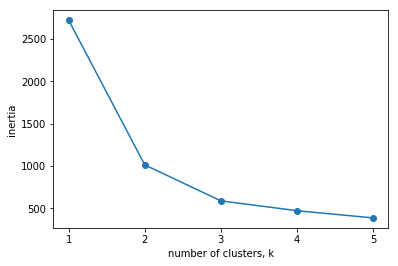

In [24]:
%matplotlib inline
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)


The inertia decreases very slowly from 3 clusters to 4, so it looks like 3 clusters would be a good choice for this data.

<p id ='Etgc'><p>
### Evaluating the grain clustering
We observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.



In [403]:
model = KMeans(n_clusters= 3)

In [404]:
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [405]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels':labels, 'varieties':varieties})
df.head()

labels   varieties
0       1  Kama wheat
1       1  Kama wheat
2       1  Kama wheat
3       1  Kama wheat
4       1  Kama wheat

210

In [28]:
ct = pd.crosstab(df.labels, df.varieties)
ct

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       2          60          10
1                       0           1          60
2                      68           9           0

<p id ='Tffbc'><p>
### Transforming features for better clusterings
    
To give every feature a chance, data needs to be transformed so that feature have equal variance.   

Standard Scaler transform every feature to mean zero and variance one

<p id ='Sfdfc'><p>
### Scaling fish data for clustering

In [409]:
fish = pd.read_csv('./fish.csv', header=None)
print(fish.head())


       0      1     2     3     4     5     6
0  Bream  242.0  23.2  25.4  30.0  38.4  13.4
1  Bream  290.0  24.0  26.3  31.2  40.0  13.8
2  Bream  340.0  23.9  26.5  31.1  39.8  15.1
3  Bream  363.0  26.3  29.0  33.5  38.0  13.3
4  Bream  430.0  26.5  29.0  34.0  36.6  15.1


In [30]:
species = fish[0].tolist()

In [31]:
samples = fish.drop(0, axis = 'columns').values
samples.shape

(85, 6)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [33]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=4)

In [34]:
pipeline = make_pipeline(scaler, kmeans)

In [35]:
pipeline.fit(samples)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

<p id ='Ctfd'><p>
### Clustering the fish data

In [36]:
labels = pipeline.predict(samples)

In [37]:
df = pd.DataFrame({'labels':labels, 'species':species})
df.head()

labels species
0       2   Bream
1       1   Bream
2       1   Bream
3       1   Bream
4       1   Bream

In [38]:
ct = pd.crosstab(df.labels, df.species)
ct

species  Bream  Pike  Roach  Smelt
labels                            
0            0    17      0      0
1           33     0      1      0
2            1     0     19      1
3            0     0      0     13

Excellent! It looks like the fish data separates really well into 4 clusters!



<p id ='CsuK'><p>
### Clustering stocks using KMeans
k-means clustering to cluster companies according to their stock price movements

In [39]:
stocks = pd.read_csv('./company-stock-movements-2010-2015-incl.csv', index_col=0, parse_dates=True)
stocks.head()

2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
Apple               0.580000   -0.220005   -3.409998   -1.170000    1.680011   
AIG                -0.640002   -0.650000   -0.210001   -0.420000    0.710001   
Amazon             -2.350006    1.260009   -2.350006   -2.009995    2.960006   
American express    0.109997    0.000000    0.260002    0.720002    0.190003   
Boeing              0.459999    1.770000    1.549999    2.690003    0.059997   

                  2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
Apple              -2.689994   -1.469994    2.779997   -0.680003   -4.999995   
AIG                -0.200001   -1.130001    0.069999   -0.119999   -0.500000   
Amazon             -2.309997   -1.640007    1.209999   -1.790001   -2.039994   
American express   -0.270001    0.750000    0.300004    0.639999   -0.130001   
Boeing             -1.080002    0.360000    0.549999    0.530002   -0.709999   

                     ...      2013-10-16  2013-10-17  2013-10-18  2013-10-21  \
Apple                ...        0.320008    4.519997    2.899987    9.590019   
AIG                  ...        0.919998    0.709999    0.119999   -0.480000   
Amazon               ...        2.109985    3.699982    9.570008   -3.450013   
American express     ...        0.680001    2.290001    0.409996   -0.069999   
Boeing               ...        1.559997    2.480003    0.019997   -1.220001   

                  2013-10-22  2013-10-23  2013-10-24  2013-10-25  2013-10-28  \
Apple              -6.540016    5.959976    6.910011   -5.359962    0.840019   
AIG                 0.010002   -0.279998   -0.190003   -0.040001   -0.400002   
Amazon              4.820008   -4.079986    2.579986    4.790009   -1.760009   
American express    0.100006    0.069999    0.130005    1.849999    0.040001   
Boeing              0.480003    3.020004   -0.029999    1.940002    1.130005   

                  2013-10-29  
Apple             -19.589981  
AIG                 0.660000  
Amazon              3.740021  
American express    0.540001  
Boeing              0.309998  

[5 rows x 963 columns]

In [413]:
movements = stocks.values


In [41]:
companies = stocks.index.values.tolist()
companies[:10]

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive']

In [414]:
from sklearn.preprocessing import Normalizer

In [43]:
normalizer = Normalizer()

In [44]:
kmeans = KMeans()

In [45]:
pipeline = make_pipeline(normalizer, kmeans)

In [46]:
pipeline.fit(movements)

Pipeline(memory=None,
     steps=[('normalizer', Normalizer(copy=True, norm='l2')), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [47]:
labels = pipeline.predict(movements)

In [48]:
labels

array([5, 2, 5, 2, 3, 2, 1, 0, 1, 6, 1, 7, 1, 1, 1, 0, 2, 5, 2, 1, 1, 0,
       1, 1, 7, 4, 2, 6, 6, 3, 1, 1, 1, 7, 0, 1, 3, 1, 6, 4, 6, 6, 1, 1,
       1, 0, 1, 1, 0, 1, 7, 7, 1, 1, 4, 2, 4, 1, 1, 5], dtype=int32)

In [49]:
df = pd.DataFrame({'labels':labels, 'companies':companies })
df.head()

labels         companies
0       5             Apple
1       2               AIG
2       5            Amazon
3       2  American express
4       3            Boeing

In [50]:
df.sort_values(by = 'labels').head(10)

labels      companies
21       0          Honda
45       0           Sony
15       0           Ford
7        0          Canon
34       0     Mitsubishi
48       0         Toyota
23       1            IBM
53       1  Valero Energy
52       1       Unilever
49       1          Total

<p id ='Wsmt'><p>
### Which stocks move together?

# 2. Visualization with hierarchical clustering and t-SNE

<p id ='Vh'><p>
## Visualizing hierarchies

<p id ='Hmm'><p>
### How many merges?

<p id ='Hcotgd'><p>
### Hierarchical clustering of the grain data
    
Scipy `linkage` function performs hierarchical clustering on array of samples

In [51]:
grainSeed.head()

0      1       2      3      4      5      6
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175

In [52]:
np.random.seed(42)

In [53]:
samples = grainSeed.values
samples = np.random.permutation(samples)
samples = samples[:42]


In [54]:
varieties = np.random.permutation(varieties)
varieties = varieties[:42]
varieties

array(['Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat', 'Canadian wheat', 'Rosa wheat',
       'Kama wheat', 'Rosa wheat', 'Rosa wheat', 'Rosa wheat',
       'Kama wheat', 'Rosa wheat', 'Kama wheat', 'Canadian wheat',
       'Kama wheat', 'Kama wheat', 'Rosa wheat', 'Rosa wheat',
       'Canadian wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Kama wheat', 'Rosa wheat', 'Kama wheat', 'Kama wheat',
       'Rosa wheat', 'Rosa wheat', 'Rosa wheat', 'Canadian wheat',
       'Canadian wheat', 'Canadian wheat', 'Rosa wheat', 'Rosa wheat',
       'Rosa wheat', 'Kama wheat', 'Canadian wheat', 'Rosa wheat',
       'Rosa wheat', 'Rosa wheat'], dtype='<U14')

In [55]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [56]:
# Perform hierarchical on samples using the linkage
mergings = linkage(samples, method='complete')


In [57]:
mergings.shape

(41, 4)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [30.0, 30.0, 50.0, 50.0],
  [10.0, 10.0, 40.0, 40.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [72.5, 72.5, 103.75, 103.75],
  [25.0, 25.0, 88.125, 88.125],
  [135.0, 135.0, 145.0, 145.0],
  [185.0, 185.0, 195.0, 195.0],
  [175.0, 175.0, 190.0, 190.0],
  [165.0, 165.0, 182.5, 182.5],
  [155.0, 155.0, 173.75, 173.75],
  [140.0, 140.0, 164.375, 164.375],
  [205.0, 205.0, 215.0, 215.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [210.0, 210.0, 232.5, 232.5],
  [265.0, 265.0, 275.0, 275.0],
  [255.0, 255.0, 270.0, 270.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [315.0, 315.0, 332.5, 332.5],
  [292.5, 292.5, 323.75, 323.75],
  [262.5, 262.5, 308.125, 308.125],
  [221.25, 221.25,

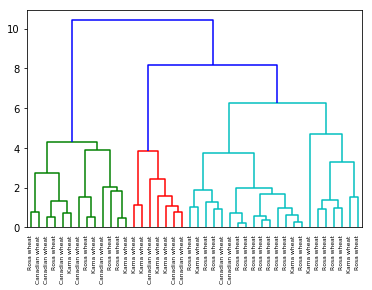

In [58]:

dendrogram(mergings, labels=varieties, leaf_rotation=90, leaf_font_size=6)

<p id ='Hos'><p>
### Hierarchies of stocks

In [418]:
from sklearn.preprocessing import normalize

In [419]:
movements

array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [420]:
normalized_movements = normalize(movements)
normalized_movements.shape

(60, 963)

In [421]:
#Calculate the linkage 
mergings = linkage(normalized_movements, method='complete')

In [422]:
mergings.shape


(59, 4)

In [64]:
%matplotlib inline

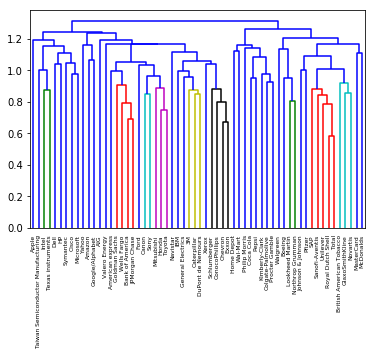

In [65]:
_=dendrogram(mergings, labels=companies, leaf_rotation= 90, leaf_font_size=6)

<p id ='Clihc'><p>
### Cluster labels in hierarchical clustering
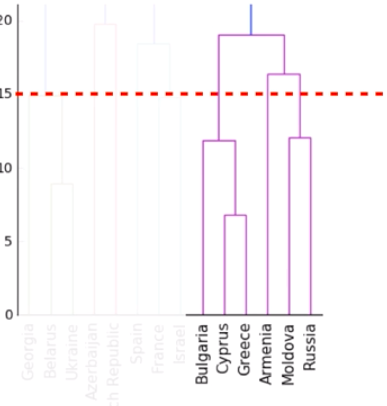
    
y-axis or height on dendrogram = height on merging clusters.  
for e.g. distance between clusters with only cyrus and greece had distance approx 6.  
So the height species the max.distance between merging clusters

<p id ='Ic'><p>
### Intermediate clusterings

<p id ='Etcl'><p>
### Extracting the cluster labels

In [66]:
from scipy.cluster.hierarchy import fcluster

In [67]:

stocks.head()

2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
Apple               0.580000   -0.220005   -3.409998   -1.170000    1.680011   
AIG                -0.640002   -0.650000   -0.210001   -0.420000    0.710001   
Amazon             -2.350006    1.260009   -2.350006   -2.009995    2.960006   
American express    0.109997    0.000000    0.260002    0.720002    0.190003   
Boeing              0.459999    1.770000    1.549999    2.690003    0.059997   

                  2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
Apple              -2.689994   -1.469994    2.779997   -0.680003   -4.999995   
AIG                -0.200001   -1.130001    0.069999   -0.119999   -0.500000   
Amazon             -2.309997   -1.640007    1.209999   -1.790001   -2.039994   
American express   -0.270001    0.750000    0.300004    0.639999   -0.130001   
Boeing             -1.080002    0.360000    0.549999    0.530002   -0.709999   

                     ...      2013-10-16  2013-10-17  2013-10-18  2013-10-21  \
Apple                ...        0.320008    4.519997    2.899987    9.590019   
AIG                  ...        0.919998    0.709999    0.119999   -0.480000   
Amazon               ...        2.109985    3.699982    9.570008   -3.450013   
American express     ...        0.680001    2.290001    0.409996   -0.069999   
Boeing               ...        1.559997    2.480003    0.019997   -1.220001   

                  2013-10-22  2013-10-23  2013-10-24  2013-10-25  2013-10-28  \
Apple              -6.540016    5.959976    6.910011   -5.359962    0.840019   
AIG                 0.010002   -0.279998   -0.190003   -0.040001   -0.400002   
Amazon              4.820008   -4.079986    2.579986    4.790009   -1.760009   
American express    0.100006    0.069999    0.130005    1.849999    0.040001   
Boeing              0.480003    3.020004   -0.029999    1.940002    1.130005   

                  2013-10-29  
Apple             -19.589981  
AIG                 0.660000  
Amazon              3.740021  
American express    0.540001  
Boeing              0.309998  

[5 rows x 963 columns]

Using matplotlib backend: MacOSX


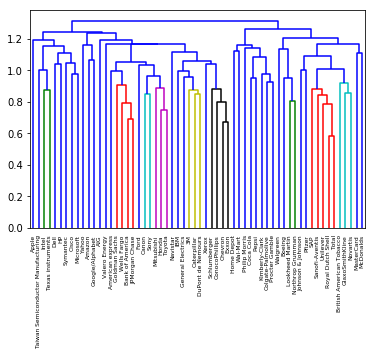

In [68]:
% matplotlib auto
movements = stocks.values
normalized_movements = normalize(movements)
mergings = linkage(normalized_movements, method='complete')
_=dendrogram(mergings, labels=companies, leaf_rotation= 90, leaf_font_size=6)

In [69]:
# Use fcluster to extract labels: labels
labels = fcluster(mergings, 1.2, criterion = 'distance' )

In [70]:
labels

array([1, 3, 2, 3, 5, 3, 6, 3, 3, 4, 3, 1, 3, 3, 1, 3, 3, 2, 3, 6, 4, 3,
       1, 3, 1, 6, 3, 4, 4, 5, 6, 6, 3, 1, 3, 3, 5, 6, 4, 6, 4, 4, 6, 6,
       3, 3, 6, 1, 3, 6, 1, 1, 6, 3, 5, 3, 4, 3, 3, 2], dtype=int32)

In [71]:
grainSeed.head()

0      1       2      3      4      5      6
0  15.26  14.84  0.8710  5.763  3.312  2.221  5.220
1  14.88  14.57  0.8811  5.554  3.333  1.018  4.956
2  14.29  14.09  0.9050  5.291  3.337  2.699  4.825
3  13.84  13.94  0.8955  5.324  3.379  2.259  4.805
4  16.14  14.99  0.9034  5.658  3.562  1.355  5.175

<p id ='tf2m'><p>
### t-SNE for 2-dimensional maps
* t-distributed stochastic neighbour embedding
* Great for inspecting data
* Map approximately preserves nearness of sample



In [72]:
samples =grainSeed.values

In [73]:
samples.shape

(210, 7)

<p id ='tvogd'><p>
### t-SNE visualization of grain dataset

In [74]:
%matplotlib inline

In [75]:
from sklearn.manifold import TSNE

In [76]:
model = TSNE(learning_rate=200)

In [77]:
tsne_features = model.fit_transform(samples)

In [78]:
print(samples.shape)
print(tsne_features.shape)

(210, 7)
(210, 2)


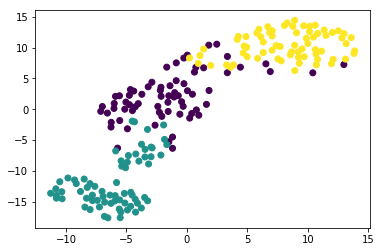

In [79]:
xs, ys = tsne_features[:, 0], tsne_features[:, 1]
plt.scatter(xs, ys, c= variety_numbers)

<p id ='Atmotsm'><p>
### A t-SNE map of the stock market

In [80]:
stocks.head()

2010-01-04  2010-01-05  2010-01-06  2010-01-07  2010-01-08  \
Apple               0.580000   -0.220005   -3.409998   -1.170000    1.680011   
AIG                -0.640002   -0.650000   -0.210001   -0.420000    0.710001   
Amazon             -2.350006    1.260009   -2.350006   -2.009995    2.960006   
American express    0.109997    0.000000    0.260002    0.720002    0.190003   
Boeing              0.459999    1.770000    1.549999    2.690003    0.059997   

                  2010-01-11  2010-01-12  2010-01-13  2010-01-14  2010-01-15  \
Apple              -2.689994   -1.469994    2.779997   -0.680003   -4.999995   
AIG                -0.200001   -1.130001    0.069999   -0.119999   -0.500000   
Amazon             -2.309997   -1.640007    1.209999   -1.790001   -2.039994   
American express   -0.270001    0.750000    0.300004    0.639999   -0.130001   
Boeing             -1.080002    0.360000    0.549999    0.530002   -0.709999   

                     ...      2013-10-16  2013-10-17  2013-10-18  2013-10-21  \
Apple                ...        0.320008    4.519997    2.899987    9.590019   
AIG                  ...        0.919998    0.709999    0.119999   -0.480000   
Amazon               ...        2.109985    3.699982    9.570008   -3.450013   
American express     ...        0.680001    2.290001    0.409996   -0.069999   
Boeing               ...        1.559997    2.480003    0.019997   -1.220001   

                  2013-10-22  2013-10-23  2013-10-24  2013-10-25  2013-10-28  \
Apple              -6.540016    5.959976    6.910011   -5.359962    0.840019   
AIG                 0.010002   -0.279998   -0.190003   -0.040001   -0.400002   
Amazon              4.820008   -4.079986    2.579986    4.790009   -1.760009   
American express    0.100006    0.069999    0.130005    1.849999    0.040001   
Boeing              0.480003    3.020004   -0.029999    1.940002    1.130005   

                  2013-10-29  
Apple             -19.589981  
AIG                 0.660000  
Amazon              3.740021  
American express    0.540001  
Boeing              0.309998  

[5 rows x 963 columns]

In [423]:
from sklearn.manifold import TSNE

In [424]:
model = TSNE(learning_rate=50)

In [431]:
normalized_movements.shape

(60, 963)

In [434]:
# Apply fit_transform to normalized_movements: tsne_features

tsne_features = model.fit_transform(normalized_movements)
tsne_features.shape

(60, 2)

In [433]:
tsne_features[:10]

array([[-0.8340376 , -1.2646211 ],
       [ 1.2562791 ,  3.222472  ],
       [ 4.509035  , -0.13280216],
       [ 1.8474523 ,  1.4776173 ],
       [ 2.9703498 ,  2.551592  ],
       [ 1.3871596 ,  2.3437238 ],
       [ 2.0203822 , -1.6828303 ],
       [ 0.55504626,  0.88808995],
       [ 1.173385  , -0.03234885],
       [ 3.4386802 , -3.366952  ]], dtype=float32)

In [428]:
xs, ys = tsne_features[: , 0], tsne_features[:, 1]


In [429]:
%matplotlib auto
plt.scatter(xs, ys , alpha=0.5)

Using matplotlib backend: MacOSX


In [430]:
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


In [89]:
plt.close()

# 3. Decorrelating your data and dimension reduction


<p id ='VtPt'><p>
### Visualizing the PCA transformation
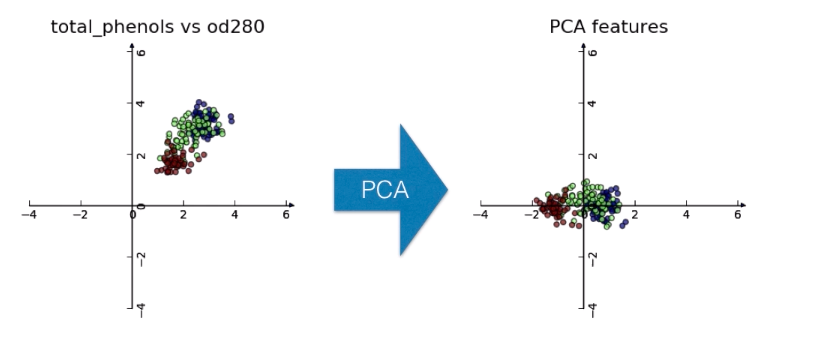

**Dimension reduction** find patterns in data and uses these pattern to reexpress it in a compressed form.
* More efficient storage and computation.
* Remove less-informative "noise" features.

Most Fundamental technique of dimension reduction :  
**PCA: Principal Component Analysis**

* Rotates data samples to be aligned with axes
* Shifts data samples so they have mean 0.
* No information is lost.


<p id ='Cdin'><p>
### Correlated data in nature

In [435]:
grainsdf = pd.read_csv('./Grains/seeds-width-vs-length.csv', header= None)
grainsdf.head()

0      1
0  3.312  5.763
1  3.333  5.554
2  3.337  5.291
3  3.379  5.324
4  3.562  5.658

In [436]:
grains = grainsdf.values
grains[:10]

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884]])

(2.549993369175627, 4.113006630824374, 4.795023399558499, 6.778976600441501)

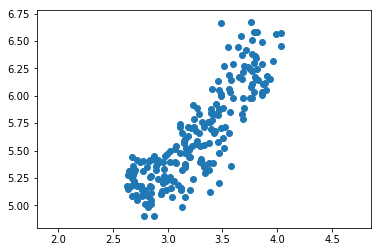

In [437]:
%matplotlib inline
plt.scatter(grains[:, 0], grains[:, 1])
plt.axis('equal')

In [438]:
from scipy.stats import pearsonr

In [439]:
correlation , pvalue = pearsonr(grains[:, 0], grains[:, 1])
correlation

0.8604149377143467

<p id ='DtgmwP'><p>
### Decorrelating the grain measurements with PCA

In [440]:
from sklearn.decomposition import PCA

In [441]:
model = PCA()

In [442]:
pca_features = model.fit_transform(grains)


In [443]:
xs , ys = pca_features[:, 0], pca_features[:, 1]

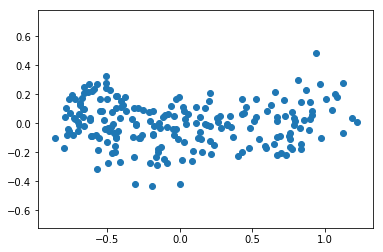

In [444]:
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

In [445]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)
correlation

7.474656899453042e-17

<p id ='Pc'><p>
### Principal components

<p id ='Id'><p>
## Intrinsic dimension
Number of features required to approximate the dataset or (in other words) Number of features with significant variance
    
PCA identifies intrinsic dimension when sample have any number of features 
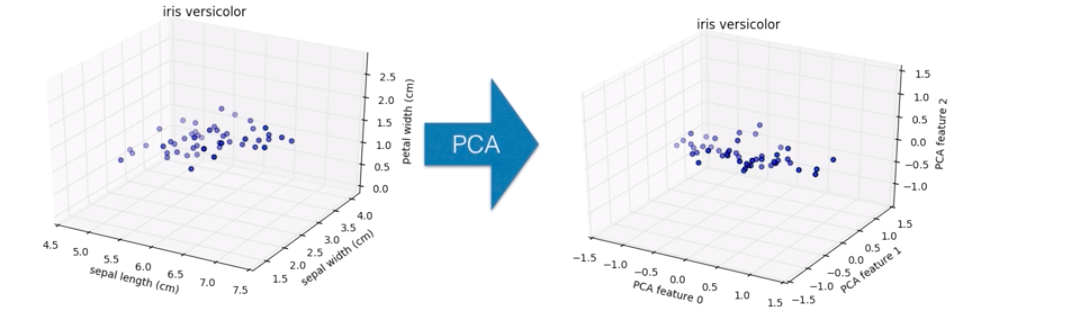
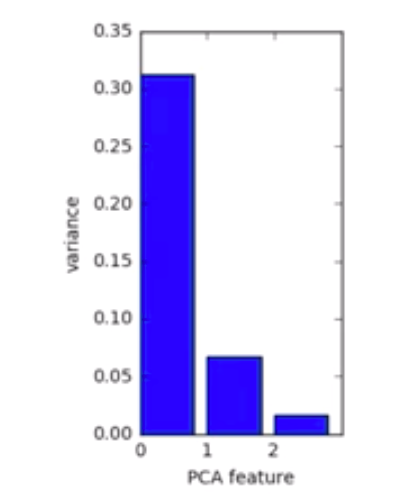

<p id ='Tfpc'><p>
### The first principal component
The first principle component of data is the direction in which the data varies the most.
    
Your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

In [101]:
grains[:10]

array([[3.312, 5.763],
       [3.333, 5.554],
       [3.337, 5.291],
       [3.379, 5.324],
       [3.562, 5.658],
       [3.312, 5.386],
       [3.259, 5.563],
       [3.302, 5.42 ],
       [3.465, 6.053],
       [3.505, 5.884]])

Using matplotlib backend: MacOSX


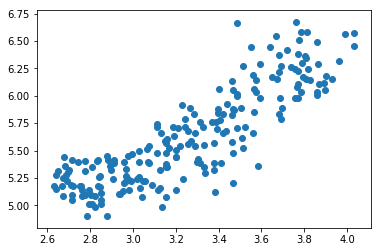

In [102]:
%matplotlib auto
plt.scatter(grains[:, 0], grains[:, 1])

In [103]:
model = PCA()
model.fit(grains)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [104]:
# Get the mean of the grain samples: mean
mean = model.mean_
mean

array([3.25860476, 5.62853333])

In [105]:
model.components_

array([[ 0.63910027,  0.76912343],
       [-0.76912343,  0.63910027]])

In [106]:
# Get the first principal component: first_pc
first_pc = model.components_[0, :]
first_pc

array([0.63910027, 0.76912343])

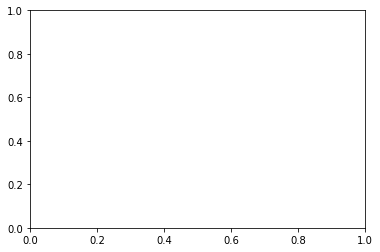

In [107]:
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color = 'red', width = 0.01)

In [108]:
plt.close()

<p id ='VotPf'><p>
### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.



In [109]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [110]:
print(type(fish))
print(fish.shape)

<class 'pandas.core.frame.DataFrame'>
(85, 7)


In [111]:
fish_samples = fish.drop(0, axis = 'columns').values
fish_samples[:5]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1]])

In [112]:
fish_samples.shape

(85, 6)

In [113]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(fish_samples)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False))])

In [114]:
# Plot the explained variance
features = range(pca.n_components_)

In [115]:
features

range(0, 6)

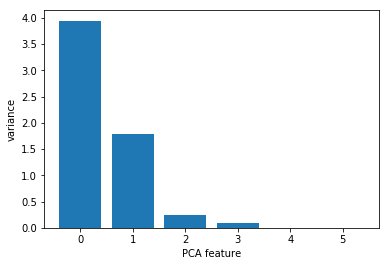

In [116]:
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


<p id = 'dim'> <p>
It looks like PCA features **0 and 1** have significant variance.

Thus the intrinsic dimension fish samples is 2.

In [117]:
pca.explained_variance_


array([3.94616746e+00, 1.78097907e+00, 2.43235593e-01, 1.00351845e-01,
       5.63140996e-04, 1.31462706e-04])

<p id ='DrwP'><p>
### Dimension reduction with PCA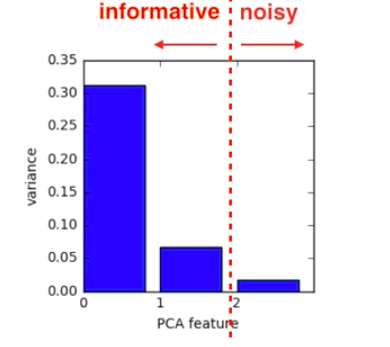
    
#### Dimension reduction with PCA
* Specify how many features to keep
* for e.g. PCA(n_components= 2)


Discard low variance PCA features.




<p id ='Drotfm'><p>
### Dimension reduction of the fish measurements

In [121]:
fish_samples[:10]

array([[242. ,  23.2,  25.4,  30. ,  38.4,  13.4],
       [290. ,  24. ,  26.3,  31.2,  40. ,  13.8],
       [340. ,  23.9,  26.5,  31.1,  39.8,  15.1],
       [363. ,  26.3,  29. ,  33.5,  38. ,  13.3],
       [430. ,  26.5,  29. ,  34. ,  36.6,  15.1],
       [450. ,  26.8,  29.7,  34.7,  39.2,  14.2],
       [500. ,  26.8,  29.7,  34.5,  41.1,  15.3],
       [390. ,  27.6,  30. ,  35. ,  36.2,  13.4],
       [450. ,  27.6,  30. ,  35.1,  39.9,  13.8],
       [500. ,  28.5,  30.7,  36.2,  39.3,  13.7]])

In [122]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [123]:
scaler= StandardScaler()

In [127]:
scaled_fish_samples = scaler.fit_transform(fish_samples)
scaled_fish_samples.shape

(85, 6)

Recall
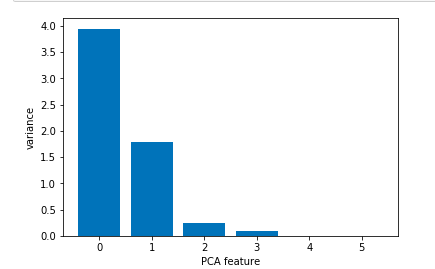
here intrinsic [dimension =2](#dim)


In [128]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components= 2)
pca.fit(scaled_fish_samples)
# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_fish_samples)
pca_features.shape

(85, 2)

<p id ='Atwa'><p>
### A tf-idf word-frequency array
    
Term frequency- inverse document frequency  
tf-idf is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus  

You'll create a tf-idf word frequency array for a toy collection of documents. 

Word frequency array
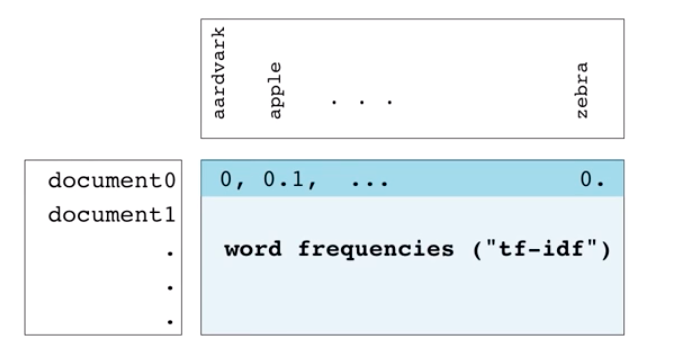

In [129]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']

In [130]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [131]:
tfidf = TfidfVectorizer()

In [132]:
# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)
csr_mat

<3x6 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

In [135]:
print(csr_mat.toarray())

[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]


In [446]:
words = tfidf.get_feature_names()
words

['cats', 'chase', 'dogs', 'meow', 'say', 'woof']

<p id ='CWpI'><p>
### SVD--- Clustering Wikipedia part I

In [146]:
more ./wikipedia_articles/wikipedia-vectors.csv

In [145]:
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [147]:
# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

In [148]:
# Create a KMeans instance
kmeans = KMeans(n_clusters=6)

In [149]:
# Create a pipeline 
pipeline = make_pipeline(svd, kmeans)

<p id ='CWpI'><p>
### Clustering Wikipedia part II

In [150]:
import pandas as pd

In [209]:

from scipy.sparse import csr_matrix

In [188]:
df = pd.read_csv('./wikipedia_articles/wikipedia-vectors.csv', index_col=0)
df.head()

HTTP 404  Alexa Internet  Internet Explorer  HTTP cookie  Google Search  \
0       0.0        0.000000                0.0          0.0            0.0   
1       0.0        0.000000                0.0          0.0            0.0   
2       0.0        0.029607                0.0          0.0            0.0   
3       0.0        0.000000                0.0          0.0            0.0   
4       0.0        0.000000                0.0          0.0            0.0   

   Tumblr  Hypertext Transfer Protocol  Social search  Firefox  LinkedIn  \
0     0.0                          0.0            0.0      0.0       0.0   
1     0.0                          0.0            0.0      0.0       0.0   
2     0.0                          0.0            0.0      0.0       0.0   
3     0.0                          0.0            0.0      0.0       0.0   
4     0.0                          0.0            0.0      0.0       0.0   

      ...       Chad Kroeger  Nate Ruess  The Wanted  Stevie Nicks  \
0     ...                0.0         0.0         0.0      0.008878   
1     ...                0.0         0.0         0.0      0.000000   
2     ...                0.0         0.0         0.0      0.000000   
3     ...                0.0         0.0         0.0      0.000000   
4     ...                0.0         0.0         0.0      0.000000   

   Arctic Monkeys  Black Sabbath  Skrillex  Red Hot Chili Peppers   Sepsis  \
0             0.0            0.0  0.049502               0.000000  0.00000   
1             0.0            0.0  0.000000               0.000000  0.00611   
2             0.0            0.0  0.000000               0.000000  0.00000   
3             0.0            0.0  0.000000               0.005646  0.00000   
4             0.0            0.0  0.000000               0.000000  0.00000   

   Adam Levine  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 60 columns]

In [183]:
titles = list(df.columns)

In [204]:
articles = csr_matrix(df.transpose())

In [205]:
articles.shape

(60, 13125)

In [206]:
pipeline.fit(articles)

Pipeline(memory=None,
     steps=[('truncatedsvd', TruncatedSVD(algorithm='randomized', n_components=50, n_iter=5,
       random_state=None, tol=0.0)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [207]:
labels = pipeline.predict(articles)
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [208]:
# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
59      0                                    Adam Levine
57      0                          Red Hot Chili Peppers
56      0                                       Skrillex
55      0                                  Black Sabbath
54      0                                 Arctic Monkeys
53      0                                   Stevie Nicks
52      0                                     The Wanted
51      0                                     Nate Ruess
50      0                                   Chad Kroeger
58      0                                         Sepsis
19      1  2007 United Nations Climate Change Conference
18      1  2010 United Nations Climate Change Conference
17      1  Greenhouse gas emissions by the United States
16      1                                        350.org
15      1                                 Kyoto Protocol
11      1       Nationally Appropriate Mitigation Action
13      1                      

In [201]:
labels.shape

(13125,)

# 4. Discovering interpretable features

<p id ='Nmf('><p>
### Non-negative matrix factorization (NMF)
* Dimension reduction technique
* NMF models are interpretable(unlike PCA)
* Easy to interpret means easy to explain.
    
NMF expresses documents as combinations of topics
    
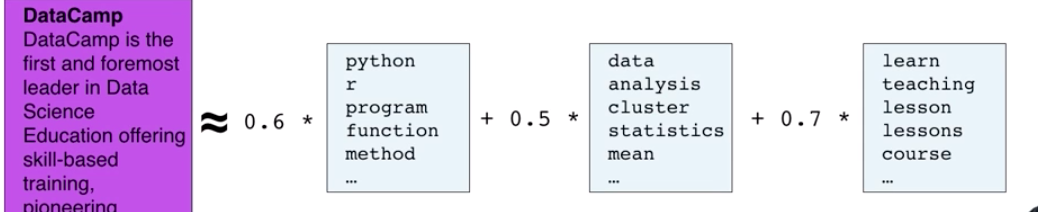

* Entries of NMF components are always NONE NEGATIVE
* NMF feature values are also NONE NEGATIVE

<p id ='Nd'><p>
### Non-negative data

<p id ='NatWa'><p>
### NMF applied to Wikipedia articles
Now it's your turn to apply NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a csr matrix articles. Here, fit the model and transform the articles.


In [210]:
from sklearn.decomposition import NMF

In [212]:
# Create an NMF instance: model
model = NMF(n_components=6)


In [222]:
articles

<60x13125 sparse matrix of type '<class 'numpy.float64'>'
	with 42091 stored elements in Compressed Sparse Row format>

In [217]:
model.fit(articles)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [218]:
articles.shape

(60, 13125)

In [216]:
# Tranform the articles
nmf_features = model.transform(articles)
nmf_features.shape

(60, 6)

<p id ='NfotWa'><p>
### NMF features of the Wikipedia articles
Explore the NMF features you created in the previous part

In [226]:
df = pd.DataFrame(nmf_features, index=titles)
df.head()

0    1    2    3    4         5
HTTP 404           0.00000  0.0  0.0  0.0  0.0  0.440521
Alexa Internet     0.00000  0.0  0.0  0.0  0.0  0.566676
Internet Explorer  0.00382  0.0  0.0  0.0  0.0  0.398697
HTTP cookie        0.00000  0.0  0.0  0.0  0.0  0.381788
Google Search      0.00000  0.0  0.0  0.0  0.0  0.485578

In [228]:
df.loc['Anne Hathaway']

0    0.003845
1    0.000000
2    0.000000
3    0.575583
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64

In [230]:
df.loc['Denzel Washington']

0    0.000000
1    0.005601
2    0.000000
3    0.422287
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

Notice that for both actors, the NMF feature **3** has by far the highest value. This means that both articles are reconstructed using mainly the **3rd NMF component**.



<p id ='Nlip'><p>
## NMF learns interpretable parts

<p id ='Nltod'><p>
### NMF learns topics of documents

In [235]:
more ./wikipedia_articles/wikipedia-vocabulary-utf8.txt

In [243]:
with open('./wikipedia_articles/wikipedia-vocabulary-utf8.txt') as f:
    content = f.readlines()

words = [x.strip() for x in content]


In [244]:
model.components_.shape

(6, 13125)

In [250]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)
components_df
print(components_df.shape)

(6, 13125)


In [251]:
# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())


film       0.627977
award      0.253172
starred    0.245324
role       0.211485
actress    0.186428
Name: 3, dtype: float64


<p id ='EtLdd'><p>
### Explore the LED digits dataset

In [252]:
import glob

In [262]:
led_digits = pd.read_csv('./lcd-digits.csv', header= None)
led_digits.head()

0    1    2    3    4    5    6    7    8    9   ...   94   95   96   97   \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0  0.0  0.0  0.0   

   98   99   100  101  102  103  
0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 104 columns]

In [266]:
led_digits_samples = led_digits.values
led_digits_samples.shape

(100, 104)

In [286]:
digit = led_digits_samples[0]

In [287]:
bitmap = digit.reshape(13, 8)
bitmap

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

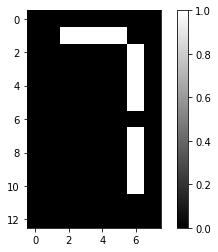

In [291]:
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()


Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array samples. This time, you are also provided with a function show_as_image() that displays the image encoded by any 1D array:

```
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
    ```

In [304]:
# 7 is the number of cells in the LED display
nmf = NMF(n_components=7)


In [305]:
led_digits_samples.shape

(100, 104)

In [306]:
features = nmf.fit_transform(led_digits_samples)

In [307]:
features.shape

(100, 7)

In [312]:
features[:5]

array([[4.76823559e-01, 0.00000000e+00, 0.00000000e+00, 5.90605054e-01,
        4.81559442e-01, 0.00000000e+00, 7.37535093e-16],
       [4.76823947e-01, 6.81486701e-01, 0.00000000e+00, 8.75345186e-23,
        4.81559442e-01, 4.93704551e-01, 0.00000000e+00],
       [0.00000000e+00, 6.81490275e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 4.93704550e-01, 4.51460009e-01],
       [0.00000000e+00, 6.81486625e-01, 0.00000000e+00, 0.00000000e+00,
        4.81559442e-01, 0.00000000e+00, 7.09227217e-16],
       [4.76826926e-01, 6.81490199e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 4.51464851e-01]])

In [313]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

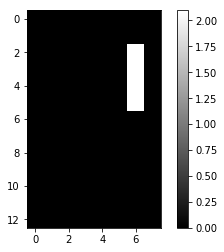

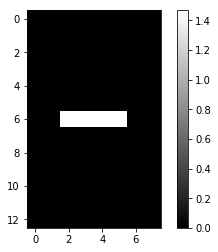

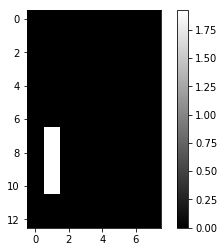

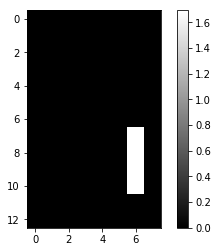

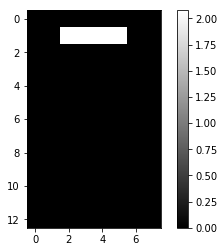

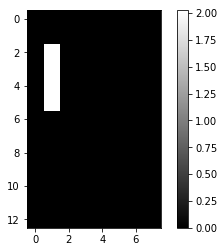

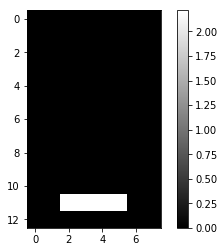

In [314]:
for component in nmf.components_:
    show_as_image(component)

<p id ='Nltpoi'><p>
### NMF learns the parts of images

<p id ='Pdlp'><p>
### PCA doesnt learn parts

<p id ='BrsuN'><p>
### Building recommender systems using NMF

<p id ='WaastR'><p>
### Which articles are similar to Cristiano Ronaldo?

In [316]:
from sklearn.preprocessing import normalize
from sklearn.decomposition import NMF
from scipy.sparse import csr_matrix


In [318]:
wikidf = pd.read_csv('./wikipedia_articles/wikipedia-vectors.csv', index_col=0)
wikidf.head()

HTTP 404  Alexa Internet  Internet Explorer  HTTP cookie  Google Search  \
0       0.0        0.000000                0.0          0.0            0.0   
1       0.0        0.000000                0.0          0.0            0.0   
2       0.0        0.029607                0.0          0.0            0.0   
3       0.0        0.000000                0.0          0.0            0.0   
4       0.0        0.000000                0.0          0.0            0.0   

   Tumblr  Hypertext Transfer Protocol  Social search  Firefox  LinkedIn  \
0     0.0                          0.0            0.0      0.0       0.0   
1     0.0                          0.0            0.0      0.0       0.0   
2     0.0                          0.0            0.0      0.0       0.0   
3     0.0                          0.0            0.0      0.0       0.0   
4     0.0                          0.0            0.0      0.0       0.0   

      ...       Chad Kroeger  Nate Ruess  The Wanted  Stevie Nicks  \
0     ...                0.0         0.0         0.0      0.008878   
1     ...                0.0         0.0         0.0      0.000000   
2     ...                0.0         0.0         0.0      0.000000   
3     ...                0.0         0.0         0.0      0.000000   
4     ...                0.0         0.0         0.0      0.000000   

   Arctic Monkeys  Black Sabbath  Skrillex  Red Hot Chili Peppers   Sepsis  \
0             0.0            0.0  0.049502               0.000000  0.00000   
1             0.0            0.0  0.000000               0.000000  0.00611   
2             0.0            0.0  0.000000               0.000000  0.00000   
3             0.0            0.0  0.000000               0.005646  0.00000   
4             0.0            0.0  0.000000               0.000000  0.00000   

   Adam Levine  
0          0.0  
1          0.0  
2          0.0  
3          0.0  
4          0.0  

[5 rows x 60 columns]

In [319]:
wikiTitles = list(wikidf.columns)

In [321]:
articles = csr_matrix(wikidf.transpose())

In [323]:
model = NMF(n_components=6)
model.fit(articles)
nmf_features = model.transform(articles)


In [325]:
# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)
norm_features.shape

(60, 6)

In [328]:
df = pd.DataFrame(norm_features, index=titles)
df.head()

0    1    2    3    4         5
HTTP 404           0.000000  0.0  0.0  0.0  0.0  1.000000
Alexa Internet     0.000000  0.0  0.0  0.0  0.0  1.000000
Internet Explorer  0.009586  0.0  0.0  0.0  0.0  0.999954
HTTP cookie        0.000000  0.0  0.0  0.0  0.0  1.000000
Google Search      0.000000  0.0  0.0  0.0  0.0  1.000000

In [336]:
article = df.loc['Cristiano Ronaldo']
article

0    0.002523
1    0.999942
2    0.000859
3    0.010274
4    0.001947
5    0.000723
Name: Cristiano Ronaldo, dtype: float64

In [338]:
similarities = df.dot(article)

In [339]:
similarities.nlargest()

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64

<p id ='RmapI'><p>
### Recommend musical artists part I

In [359]:
from sklearn.preprocessing import MaxAbsScaler, Normalizer

In [362]:
from artists import artists

In [363]:
artists

array([[  0.,   0., 105., ...,   0.,   0.,   0.],
       [128., 211.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  55.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [365]:
scaler = MaxAbsScaler()

In [366]:
model = NMF(n_components=20)

In [367]:
normalize = Normalizer()

In [368]:
pipeline = make_pipeline(scaler, model, normalize)

In [370]:
norm_features = pipeline.fit_transform(artists)

In [372]:
norm_features.shape

(111, 20)

<p id ='RmapI'><p>
### Recommend musical artists part II

In [374]:
from artist_names import  artist_names

In [375]:
df = pd.DataFrame(norm_features, index = artist_names)
df.head()

0         1    2         3        4    5    6         7   \
Massive Attack  0.00000  0.000000  0.0  0.000000  0.00572  0.0  0.0  0.055484   
Sublime         0.00000  0.000000  0.0  0.000000  0.00000  0.0  0.0  0.000000   
Beastie Boys    0.00000  0.000000  0.0  0.000000  0.00000  0.0  0.0  0.000000   
Neil Young      0.26884  0.000000  0.0  0.057988  0.00000  0.0  0.0  0.000000   
Dead Kennedys   0.00000  0.013602  0.0  0.586194  0.00000  0.0  0.0  0.000000   

                 8         9         10   11        12        13   14  \
Massive Attack  0.0  0.000000  0.005105  0.0  0.001420  0.998014  0.0   
Sublime         0.0  0.000000  0.000000  0.0  0.000000  0.005637  0.0   
Beastie Boys    0.0  0.000000  0.000000  1.0  0.000000  0.000000  0.0   
Neil Young      0.0  0.000000  0.000000  0.0  0.000000  0.000000  0.0   
Dead Kennedys   0.0  0.740531  0.000000  0.0  0.139968  0.000000  0.0   

                      15        16        17        18   19  
Massive Attack  0.000000  0.000000  0.000000  0.028777  0.0  
Sublime         0.000000  0.000000  0.000000  0.999984  0.0  
Beastie Boys    0.000000  0.000000  0.000000  0.000000  0.0  
Neil Young      0.959101  0.064641  0.000000  0.017559  0.0  
Dead Kennedys   0.079409  0.000000  0.286196  0.000000  0.0

In [376]:
# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bruce Springsteen    1.000000
Neil Young           0.956585
Van Morrison         0.873980
Leonard Cohen        0.866053
Bob Dylan            0.861038
dtype: float64


<p id ='Ft'><p>
### Final thoughts